In [45]:
#Importing needed packages
import pandas as pd #readind the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset


In [3]:
houses=pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses.shape

(1460, 81)

### Variable idenitification

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# how many columns with different data types are there?
houses.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
# Describe gives statistical information about numerical columns
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
houses.PoolArea

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

In [9]:
houses.MoSold

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1460, dtype: int64

In [10]:
houses.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [12]:
houses.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [28]:
bhouses = houses[["YearBuilt","MoSold","YrSold","SalePrice"]]
bhouses.head()

,YearBuilt,MoSold,YrSold,SalePrice
0,2003,2,2008,208500
1,1976,5,2007,181500
2,2001,9,2008,223500
3,1915,2,2006,140000
4,2000,12,2008,250000


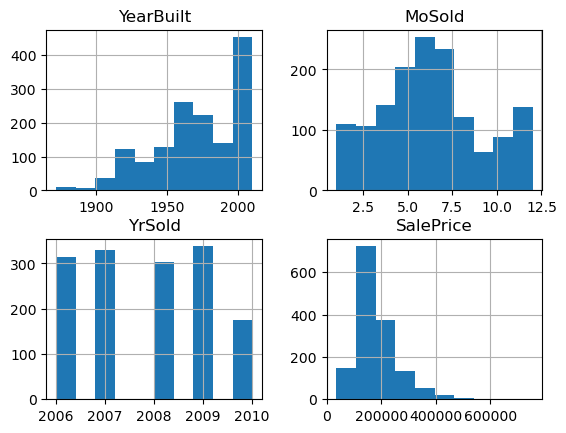

In [29]:
vit = bhouses[["YearBuilt", "MoSold","YrSold","SalePrice"]]
vit.hist()
plt.show()

In [19]:
# Select only numeric columns
numeric_houses = houses.select_dtypes(include=[np.number])

#generate the correlation matrix
correlation_matrix = numeric_houses.corr()
print(correlation_matrix)



                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [20]:
# Convert non-numeric data to numeric using one-hot encoding
encoded_houses = pd.get_dummies(houses)

# Generate the correlation matrix
correlation_matrix = encoded_houses.corr()
print(correlation_matrix)

                             Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.011156    -0.010601 -0.033226   
MSSubClass             0.011156    1.000000    -0.386347 -0.139781   
LotFrontage           -0.010601   -0.386347     1.000000  0.426095   
LotArea               -0.033226   -0.139781     0.426095  1.000000   
OverallQual           -0.028365    0.032628     0.251646  0.105806   
...                         ...         ...          ...       ...   
SaleCondition_AdjLand -0.034852    0.016241    -0.037030 -0.013208   
SaleCondition_Alloca  -0.009018    0.030002    -0.019817  0.008966   
SaleCondition_Family   0.004865    0.000983     0.016684 -0.010781   
SaleCondition_Normal   0.015881    0.024359    -0.076258  0.005711   
SaleCondition_Partial -0.020738   -0.051068     0.126571  0.022635   

                       OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                       -0.028365     0.012609  -0.012713     -0.021998   
MSSubCl

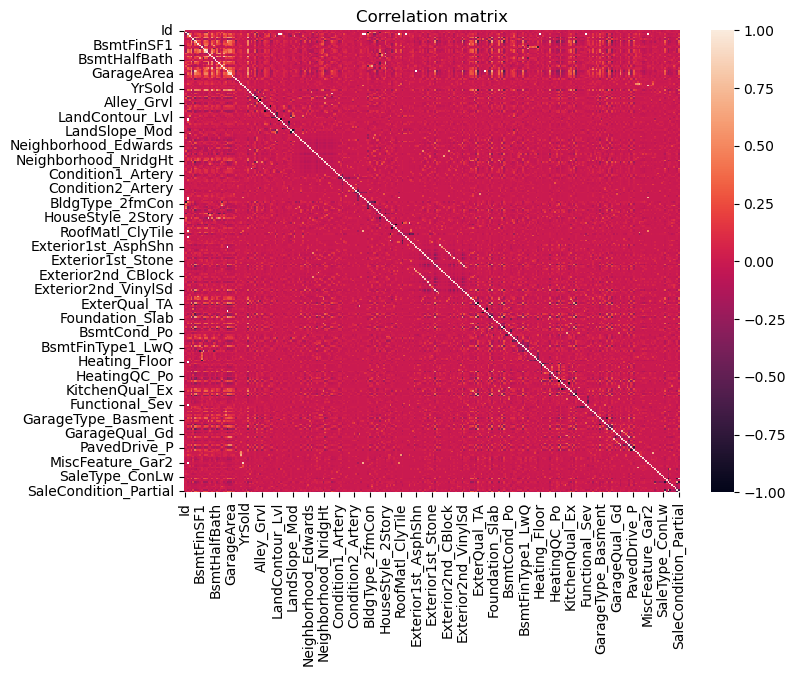

In [21]:
#visualize the correlation matrix using heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix)
plt.title("Correlation matrix")
plt.show()

In [22]:
# convert correction to long format and sort values
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort",ascending=False)

top_corr = sorted_pairs[sorted_pairs < 1].drop_duplicates().head(5)
print(top_corr)


SaleCondition_Partial  SaleType_New           0.986819
Exterior1st_VinylSd    Exterior2nd_VinylSd    0.977525
Exterior1st_CemntBd    Exterior2nd_CmentBd    0.974171
Exterior1st_MetalSd    Exterior2nd_MetalSd    0.973065
MiscFeature_Gar2       MiscVal                0.885427
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

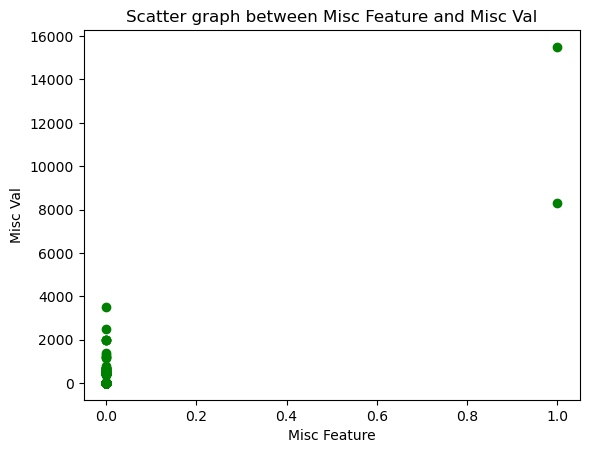

In [34]:
plt.scatter(encoded_houses["MiscFeature_Gar2"],encoded_houses["MiscVal"], color="green")
plt.xlabel("Misc Feature")
plt.ylabel("Misc Val")
plt.title("Scatter graph between Misc Feature and Misc Val")
plt.show

### training  and testing the dataset 

In [36]:
msk = np.random.rand(len(houses)) < 1.0

In [37]:
msk

array([ True,  True,  True, ...,  True,  True,  True])

In [38]:
len(msk)

1460

In [39]:
count = 0
for a in range(len(msk)):
    if (msk[a] == True):
        count = count + 1
print(count)        

1460


In [41]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
train = houses[msk]

### Modeling the data Model using sklearn packages

In [50]:
from sklearn import linear_model

# Create the linear regression model
regr = linear_model.LinearRegression()

# Convert the training data to numpy arrays
train_x = np.asanyarray(train[['MiscFeature_Gar2']])
train_y = np.asanyarray(train[['MiscVal']])

# Train the model
regr.fit(train_x, train_y)

# Print the coefficients and intercept
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)



Coefficients: [[-1730.05872854]]
Intercept: [3654560.36541016]
